In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

import os

from itertools import islice

In [3]:
from helpers import load_whole_games, get_game_summaries, get_game_lengths

In [4]:
whole_games = load_whole_games()

In [5]:
whole_games.head()

,num_a,num_b,num_aces_a,num_aces_b,num_kings_a,num_kings_b,wars,game
0,26,26,3,1,2,2,0,0
1,25,27,3,1,2,2,0,0
2,24,28,3,1,2,2,0,0
3,23,29,3,1,2,2,0,0
4,22,30,3,1,2,2,0,0


In [6]:
whole_games.shape

(27298, 8)

In [7]:
results = get_game_summaries()

In [8]:
results.head()

,game,a_starting_aces,a_starting_kings,a_won,a_won_first_round
0,0,3,2,True,True
1,1,3,3,True,True
2,2,3,3,True,True
3,3,2,2,False,True
4,4,3,2,False,True


In [9]:
results.shape

(81, 5)

In [10]:
lengths = get_game_lengths()

In [11]:
lengths.head()

,game,turns
0,0,72
1,1,52
2,2,75
3,3,250
4,4,237


## Plots

In [12]:
import itertools

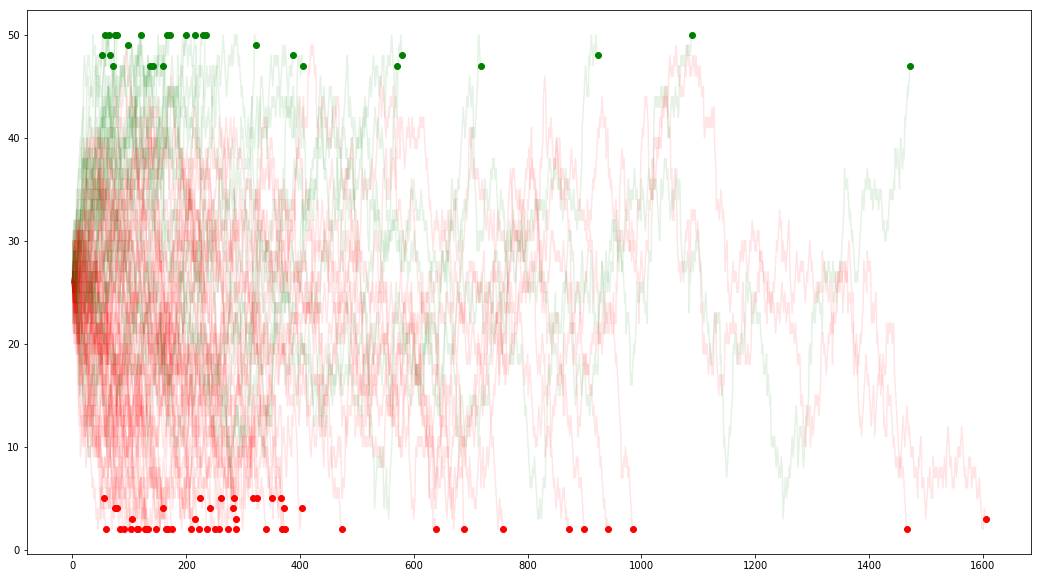

In [13]:
fig, ax = plt.subplots(figsize=(18, 10))

color_dict = {True: 'g', False: 'r'}

temp = whole_games.merge(results, on='game')
gb = temp.groupby('game')
for name, group in itertools.islice(gb, 100):
    num_turns = len(group)
    last_turn = group.tail(1)
    result = group['a_won'].iloc[0]
    
    ax.plot(range(num_turns), group['num_a'], color=color_dict[result], alpha=.1)
    ax.plot(num_turns, last_turn['num_a'], color=color_dict[result], marker='o')

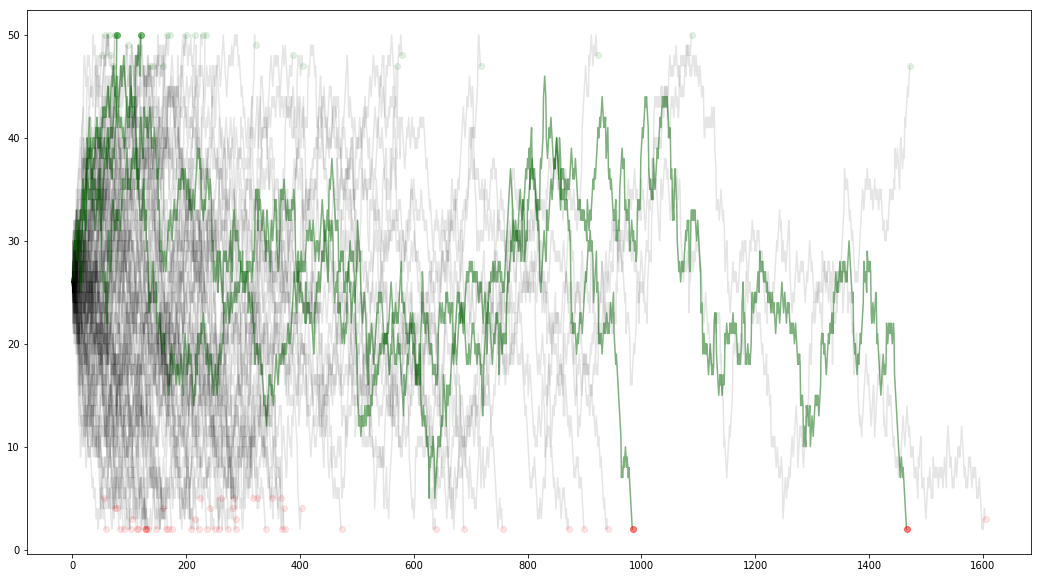

In [14]:
fig, ax = plt.subplots(figsize=(18, 10))

color_dict = {0: 'k', 1: 'k', 2: 'k',
              3: 'k', 4: 'darkgreen'}
alpha_dict = {0: .1, 1: .1, 2: .1,
              3: .1, 4: .5}

win_dict = {True: 'g', False: 'r'}


temp = whole_games.merge(results, on='game')
gb = temp.groupby('game')
for name, group in itertools.islice(gb, 100):
    num_turns = len(group)
    last_turn = group.tail(1)
    aces = group['a_starting_aces'].iloc[0]
    result = group['a_won'].iloc[0]
    
    ax.plot(range(num_turns), group['num_a'], color=color_dict[aces], alpha=alpha_dict[aces])
    ax.plot(num_turns, last_turn['num_a'], color=win_dict[result], marker='o', alpha=alpha_dict[aces])

In [15]:
len(results)

81

In [16]:
results.groupby('a_starting_aces').size()

a_starting_aces
0     8
1    14
2    30
3    25
4     4
dtype: int64

In [17]:
results.groupby('a_starting_aces')['a_won'].mean()

a_starting_aces
0    0.000000
1    0.142857
2    0.366667
3    0.520000
4    0.500000
Name: a_won, dtype: float64

In [18]:
lengths['turns'].describe()

count      81.000000
mean      337.012346
std       338.556291
min        52.000000
25%       127.000000
50%       224.000000
75%       372.000000
max      1605.000000
Name: turns, dtype: float64

In [19]:
wins_by_starts = (results
                  .groupby(['a_starting_aces', 'a_starting_kings'])['a_won'].mean()).unstack()
wins_by_starts

a_starting_kings,1,2,3,4
a_starting_aces,,,,
0,0.000000,0.000000,0.000000,NaN
1,NaN,0.000000,0.166667,1.0
2,0.333333,0.285714,0.375000,0.6
3,0.200000,0.500000,1.000000,NaN
4,NaN,0.500000,0.500000,NaN


In [20]:
counts_by_starts = (results
                    .groupby(['a_starting_aces', 'a_starting_kings'])['a_won'].size()).unstack()
counts_by_starts

a_starting_kings,1,2,3,4
a_starting_aces,,,,
0,2.0,3.0,3.0,NaN
1,NaN,7.0,6.0,1.0
2,3.0,14.0,8.0,5.0
3,10.0,8.0,7.0,NaN
4,NaN,2.0,2.0,NaN


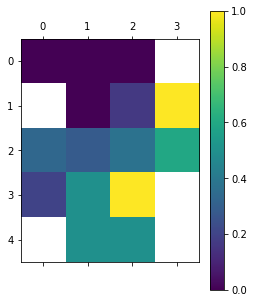

In [21]:
ax = plt.matshow(wins_by_starts.values)
plt.colorbar();

In [22]:
interesting_wins = results[(results['a_starting_aces'] == 0) & (results['a_starting_kings'] == 0)]
interesting_wins

,game,a_starting_aces,a_starting_kings,a_won,a_won_first_round


In [23]:
interesting_losses = results[(results['a_starting_aces'] == 4) & (results['a_starting_kings'] == 4)]
interesting_losses

,game,a_starting_aces,a_starting_kings,a_won,a_won_first_round


In [24]:
def plot_game_history(game_number):
    game = whole_games[whole_games['game'] == game_number].reset_index()
    wars = game[game['wars'] == 1].index

    fig, ax = plt.subplots(figsize=(18, 10))
    ax.plot(game['num_a'])

    ax2 = ax.twinx()
    loc = matplotlib.ticker.MultipleLocator(1)
    ax2.yaxis.set_major_locator(loc)
    
    ax2.plot(game['num_aces_a'], linewidth=3, c='g', label='Aces')
    ax2.plot(game['num_kings_a'], linewidth=1, c='k', label='Kings')

    for war in wars:
        ax.axvline(war, color='red', alpha=.5, dashes=(1, 1))

    for war in islice(wars, 1):
        ax2.axvline(war, color='red', alpha=.5, dashes=(1, 1), label='WAR!')
        
    ax.set_ylabel('Card Count', fontsize=12)
    ax.set_xlabel('Turn Count', fontsize=16)
    ax2.set_ylabel('King/Ace Count', fontsize=12)
        
    ax2.legend(fontsize=16, loc=3)
    return ax2

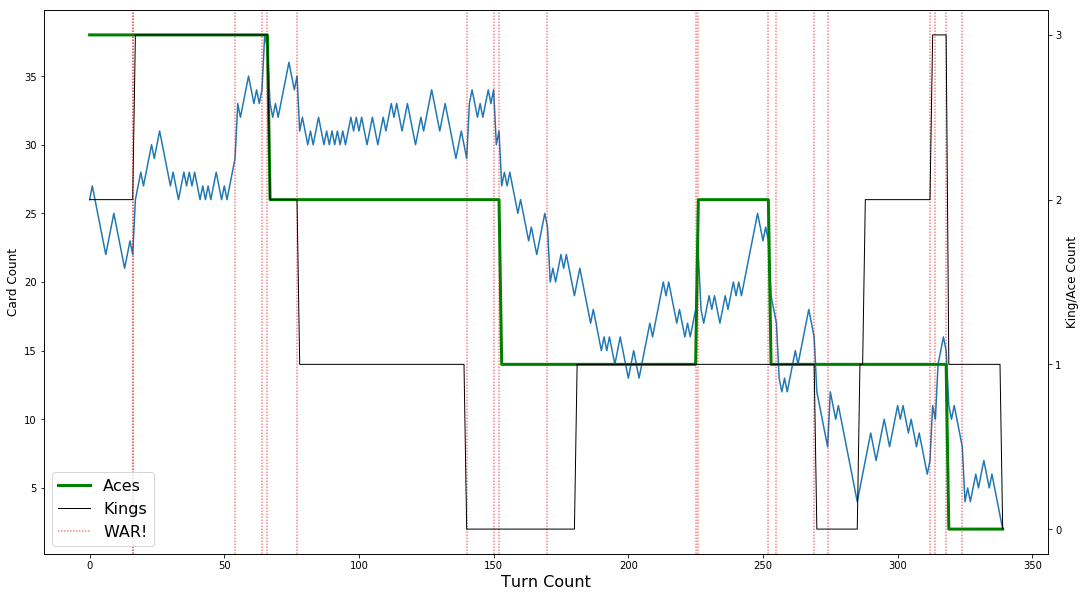

In [25]:
ax = plot_game_history(10)